In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#statsmodels modules for anova
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

#scikit-learn preprocessing libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import precision_score,plot_precision_recall_curve,accuracy_score,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer,make_column_selector,make_column_transformer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn import set_config
set_config(display = 'diagram')
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import plot_tree
import sklearn



#ols libraries
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df = pd.read_csv("cleaned_data.xlsx")

# Inferencial Stats

In [3]:
anova_ie = ols("i_c_t ~ C(schtype) * C(gender)", data=df).fit()

anova__ie_table = anova_lm(anova_ie,typ = 2)

In [48]:
anova__ie_table

,sum_sq,df,F,PR(>F)
C(schtype),1461.338846,1.0,578.174522,2.096918e-117
C(gender),70.268891,1.0,27.801685,1.435140e-07
C(schtype):C(gender),3.868186,1.0,1.530437,2.161395e-01
Residual,7933.837386,3139.0,NaN,NaN


In [49]:
anova = ols("i_c_t ~ C(schtype) + C(gender)", data=df).fit()

anovatable = anova_lm(anova,typ = 2)
anova_table

NameError: name 'anova_table' is not defined

In [ ]:
spector_data = sm.datasets.spector.load_pandas()

In [ ]:
spector_data.exog.head()

,GPA,TUCE,PSI
0,2.66,20.0,0.0
1,2.89,22.0,0.0
2,3.28,24.0,0.0
3,2.92,12.0,0.0
4,4.00,21.0,0.0


In [ ]:
dep = df[['mathematics',"integrated_science"]]

In [ ]:
import statsmodels.api as sm

dep_plus_constant = sm.add_constant(dep)

# Logit Model
logit_mod = sm.Logit(df["i_c_t"], dep_plus_constant,)

logit_res = statsmodels.discrete.discrete_model.MNLogit.fit()
# Optimization terminated successfully.
#          Current function value: 0.402801
#          Iterations 7

print(logit_res.summary())

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


ValueError: endog must be in the unit interval.

In [ ]:
sns.load_dataset("iris")['species'].nunique()

3

In [50]:
import statsmodels.api as st

dep_plus_constant = sm.add_constant(dep)
mdl = st.MNLogit(df['i_c_t'], dep_plus_constant)
 
mdl_fit = mdl.fit()
mdl_fit.summary()

NameError: name 'dep' is not defined

In [ ]:
dummies = pd.get_dummies(df.loc[:,df.columns!='circuit'],drop_first=True)
dummies.head()

In [51]:
circuit = pd.get_dummies(df["circuit"],drop_first=False)
circuit = circuit.drop(columns=["YAMORANSA"],axis =1) #drop YAMORANSA from the encoded columns

In [52]:
#concatenate circuit and the other encoded columns (dummies)

df_ols = pd.concat([circuit,dummies],axis = 1)

df_ols.columns = [x.lower() for x in df_ols.columns] #change all upper case column names to lower case
df_ols.columns = [column.replace(" ","_") for column in df_ols.columns]    #get rid of all whitespaces in column names

df_ols.head()

NameError: name 'dummies' is not defined

In [ ]:
scaler = StandardScaler()

In [ ]:
new_df = scaler.fit_transform(df_ols)

In [53]:
df_ols = pd.DataFrame(new_df,columns=df_ols.columns)

NameError: name 'df_ols' is not defined

In [ ]:
df_ols.columns

In [54]:
model = smf.ols(formula="i_c_t~age+anomabo_a+anomabo_b+mankessim_a+mankessim_b+mdominase+saltpond_a+saltpond_b+schtype_public+gender_m+mathematics+english_language",data = df_ols).fit()

NameError: name 'df_ols' is not defined

In [ ]:
model.summary()

In [55]:
model2 = smf.ols(formula="i_c_t~schtype_public+gender_m+mathematics+english_language",data = df_ols).fit()

NameError: name 'df_ols' is not defined

In [ ]:
model2.summary()

# Machine Learning Inference

## Data Preprocessing

In [4]:
df = df.drop(columns = df.iloc[:,[0]].columns)
df.head()

,cid,social_studies,integrated_science,i_c_t,r_m_e,fante,mathematics,english_language,b_d_t,schtype,age,gender,circuit,aggregate
0,302063052,1,1,1,2,2,1,2,2,PRIVATE,15.0,M,SALTPOND B,8.0
1,302063055,1,2,4,4,4,5,3,3,PRIVATE,15.0,F,SALTPOND B,18.0
2,302156005,1,3,5,2,3,4,5,5,PUBLIC,19.0,M,MANKESSIM A,18.0
3,302063042,1,1,2,2,2,2,1,2,PRIVATE,16.0,M,SALTPOND B,9.0
4,302148014,1,4,6,3,2,5,4,4,PUBLIC,17.0,M,MDOMINASE,19.0


In [5]:
new_df = df[['mathematics',"integrated_science","english_language","schtype","gender","circuit","i_c_t", "age","social_studies","r_m_e","fante","b_d_t"]]

In [6]:
X = new_df.drop(columns = ["i_c_t"],axis = 1)
y = new_df['i_c_t']

In [7]:
X.head()

,mathematics,integrated_science,english_language,schtype,gender,circuit,age,social_studies,r_m_e,fante,b_d_t
0,1,1,2,PRIVATE,M,SALTPOND B,15.0,1,2,2,2
1,5,2,3,PRIVATE,F,SALTPOND B,15.0,1,4,4,3
2,4,3,5,PUBLIC,M,MANKESSIM A,19.0,1,2,3,5
3,2,1,1,PRIVATE,M,SALTPOND B,16.0,1,2,2,2
4,5,4,4,PUBLIC,M,MDOMINASE,17.0,1,3,2,4


In [8]:
X['circuit'].value_counts()

MANKESSIM A    645
MANKESSIM B    501
SALTPOND A     462
ANOMABO A      375
MDOMINASE      333
SALTPOND B     328
ANOMABO B      251
YAMORANSA      248
Name: circuit, dtype: int64

In [9]:
y[:5]

0    1
1    4
2    5
3    2
4    6
Name: i_c_t, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cid                 3143 non-null   int64  
 1   social_studies      3143 non-null   int64  
 2   integrated_science  3143 non-null   int64  
 3   i_c_t               3143 non-null   int64  
 4   r_m_e               3143 non-null   int64  
 5   fante               3143 non-null   int64  
 6   mathematics         3143 non-null   int64  
 7   english_language    3143 non-null   int64  
 8   b_d_t               3143 non-null   int64  
 9   schtype             3143 non-null   object 
 10  age                 3143 non-null   float64
 11  gender              3143 non-null   object 
 12  circuit             3143 non-null   object 
 13  aggregate           3143 non-null   float64
dtypes: float64(2), int64(9), object(3)
memory usage: 343.9+ KB


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3,stratify=y,random_state = 111)

In [12]:
X_test.size/X.size

0.3000318167356029

In [13]:
print("size of traininig features : {}{}".format( round( (X_train.size/X.size)*100, 2), "%") )
print("size of testing features   : {}{}".format( round( (X_test.size/X.size)*100, 2), "%" ) )

size of traininig features : 70.0%
size of testing features   : 30.0%


In [14]:
circuit_order  =list(df.circuit.value_counts().index)

In [15]:
ct = ColumnTransformer([("encoder1",
                         OneHotEncoder(categories = [["M","F"],],drop = np.array(["F",]),sparse = False),
                         ['gender']),
                        
                        ("encoder2",
                         OrdinalEncoder(categories=[['PRIVATE','PUBLIC'],circuit_order],handle_unknown='error'),
                         ["schtype","circuit"])],
                       remainder = 'passthrough')



# One Hot Encoding
ohe = OneHotEncoder(categories = [['PRIVATE','PUBLIC'],["M","F"],circuit_order],
                   drop = np.array(["PRIVATE","F","YAMORANSA"]),sparse = False)


# Ordinal Encodinga
oe = OrdinalEncoder(categories=[['PRIVATE','PUBLIC'],["M","F"],circuit_order],handle_unknown='error')


ct2 = ColumnTransformer([("encoder",ohe,make_column_selector(dtype_include = "O"))],remainder = 'passthrough')

ct3 = ColumnTransformer([("encoder",oe,make_column_selector(dtype_include = "O"))],remainder = 'passthrough')

### Random  Forest Classifier

In [16]:
# ct = ColumnTransformer([("encoder",ohe,make_column_selector(dtype_include = "O"))],remainder = 'passthrough')
# ct

In [17]:
rf = RandomForestClassifier(400,criterion = 'entropy',random_state = 111)

In [18]:
pipe = Pipeline([("transformer",ct),("scaler",StandardScaler()),("model",rf)])
pipe2 = Pipeline([("transformer",ct),("model",rf)])

In [19]:
pipe2["model"].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 111,
 'verbose': 0,
 'warm_start': False}

In [20]:
grid_param = [{"transformer":[ct,ct2,ct3],
               "model__n_estimators":[range(100,500,50)],
               "model__entropy":["entropy","gini"],
               "model__min_samples_split":[range(3)],
               "model__'min_samples_leaf": [range(3)]}
              ]


gscv_rf = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1)

In [ ]:
gscv_rf

In [21]:
gscv_rf.fit(X_train,y_train)

In [ ]:
print("Best Search Score : ",gscv_rf.best_score_)
gscv_rf.best_model_

In [500]:
pipe2.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder1',
                                                  OneHotEncoder(categories=[['M',
                                                                             'F']],
                                                                drop=array(['F'], dtype='<U1'),
                                                                sparse=False),
                                                  ['gender']),
                                                 ('encoder2',
                                                  OrdinalEncoder(categories=[['PRIVATE',
                                                                              'PUBLIC'],
                                                                             ['MANKESSIM '
                                                                              'A',
                                                                              'MANKESSIM '
                                                                              'B',
                                                                              'SALTPOND '
                                                                              'A',
                                                                              'ANOMABO '
                                                                              'A',
                                                                              'MDOMINASE',
                                                                              'SALTPOND '
                                                                              'B',
                                                                              'ANOMABO '
                                                                              'B',
                                                                              'YAMORANSA']]),
                                                  ['schtype', 'circuit'])])),
                ('model',
                 RandomForestClassifier(criterion='entropy', n_estimators=400,
                                        random_state=111))])

In [501]:
pipe2.score(X_test,y_test)

0.46447507953340406

Decision

In [493]:
# X_train = ct.fit_transform(X_train)
# X_test = ct.transform(X_test)

In [458]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=400, random_state=111)

In [459]:
rf.score(X_test,y_test)

0.46447507953340406

In [460]:
rf.feature_importances_

array([0.03733515, 0.03089639, 0.10583078, 0.08302958, 0.12897679,
       0.09562571, 0.09068329, 0.1232948 , 0.08891036, 0.09117247,
       0.12424467])

### Decion Tree Classifier

In [461]:
dt = DecisionTreeClassifier(max_depth= 10,criterion = 'gini',random_state = 42)

In [462]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [463]:
dt.score(X_test,y_test)

0.38918345705196183

In [464]:
dt.feature_importances_

array([0.038516  , 0.03034529, 0.1024196 , 0.09105228, 0.13522727,
       0.0786513 , 0.08876355, 0.17685082, 0.09797248, 0.07979422,
       0.08040719])

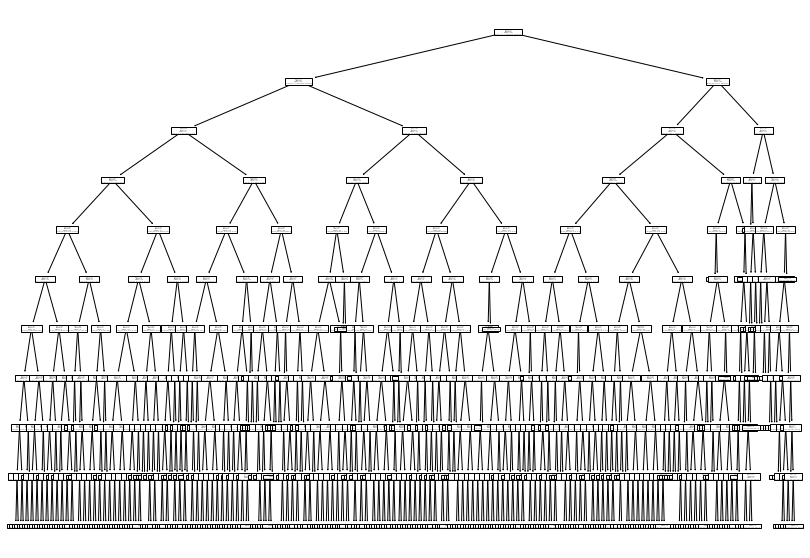

In [472]:
plt.figure(figsize=(14,10))
